- จน userid df_y น้อยกว่า df อื่น

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df_y = pd.read_csv('y_train.csv')
df_demo = pd.read_csv('demo.csv')
df_cardinfo = pd.read_csv('card_info.csv')
df_cctxn = pd.read_csv('cc_txn.csv')
df_sabal = pd.read_csv('sa_bal.csv')
df_dtxn = pd.read_csv('dtxn.csv')

all_df = {'df_y - Output for selected user ids':df_y,
        'df_demo - Personal information of customers':df_demo,
        'df_cardinfo - Credit card information':df_cardinfo,
        'df_cctxn - Credit card transaction log':df_cctxn,
        'df_sabal - Saving account balance aggregated by months':df_sabal,
        'df_dtxn - Incoming and outgoing transactions aggregated by months (exclude credit card transactions)':df_dtxn}

# all_df = [df_y, df_demo, df_cardinfo, df_cctxn, df_sabal, df_dtxn]

In [80]:
#head
for df in all_df:
    print(f"Head of DataFrame: {df} - {all_df[df].shape}:")
    display(all_df[df].head(3))
    print('\n' + '='*50 + '\n')

Head of DataFrame: df_y - Output for selected user ids - (494, 2):


,user_id,label
0,2723,1.0
1,44088,1.0
2,3139,0.0




Head of DataFrame: df_demo - Personal information of customers - (52762, 7):


,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,1975-04-15,1961.0,F,,06,04
1,14619,1971-01-31,1943.0,F,1,04,09
2,13595,1960-11-24,1952.0,F,1,07,07




Head of DataFrame: df_cardinfo - Credit card information - (60296, 4):


,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2




Head of DataFrame: df_cctxn - Credit card transaction log - (3223075, 5):


,mcc,txn_dt,user_id,txn_amt,card_no
0,mcc_cat10,2017-04-12,17863,16391.0,21616.0
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0
2,mcc_cat12,2017-05-23,33603,55602.0,39476.0




Head of DataFrame: df_sabal - Saving account balance aggregated by months - (633144, 3):


,user_id,mm,max_sa_bal
0,0,1,535052.0
1,0,10,0.0
2,0,11,161530.0




Head of DataFrame: df_dtxn - Incoming and outgoing transactions aggregated by months (exclude credit card transactions) - (490599, 4):


,user_id,mm,amt_in,amt_out
0,0,1,17725.0,4490.0
1,0,2,12431.0,29286.0
2,0,3,86274.0,0.0


In [81]:
#head
for df in all_df:
    print(f"Null check of DataFrame: {df} - {all_df[df].shape}:")

    # Clean undetectable null values
    for col in all_df[df].columns:
        if all_df[df][col].dtype == 'O':  # 'O' represents object (string) type
            all_df[df][col] = all_df[df][col].str.strip()

    all_df[df].replace('', np.nan, inplace=True)

    print(all_df[df].isnull().sum())

    print('\n' + '='*50 + '\n')

Null check of DataFrame: df_y - Output for selected user ids - (494, 2):
user_id    0
label      0
dtype: int64


Null check of DataFrame: df_demo - Personal information of customers - (52762, 7):
user_id                               0
account_start_date                    0
birth_year                            0
gender                                0
marital_status                    12295
family_income_segment_code         6822
individual_income_segment_code     3199
dtype: int64


Null check of DataFrame: df_cardinfo - Credit card information - (60296, 4):
user_id       0
bill_cyc      0
cr_lmt_amt    0
card_no       0
dtype: int64


Null check of DataFrame: df_cctxn - Credit card transaction log - (3223075, 5):
mcc        0
txn_dt     0
user_id    0
txn_amt    0
card_no    0
dtype: int64


Null check of DataFrame: df_sabal - Saving account balance aggregated by months - (633144, 3):
user_id       0
mm            0
max_sa_bal    0
dtype: int64


Null check of DataFrame: df_dtxn -

In [82]:
# for col in df_demo.columns:
#     if df_demo[col].dtype == 'O':  # 'O' represents object (string) type
#         df_demo[col] = df_demo[col].str.strip()

# df_demo.replace('', np.nan, inplace=True)

# df_demo.info()

In [83]:
df_y.sort_values('user_id', ascending=True)

,user_id,label
452,10,0.0
169,47,0.0
479,262,0.0
284,366,0.0
124,612,0.0
...,...,...
191,52039,0.0
262,52069,0.0
263,52607,0.0
424,52619,0.0


In [84]:
df_cctxn['txn_dt'].min()

'2017-01-26'

- จน userid df_y น้อยกว่า df อื่น

In [85]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52762 entries, 0 to 52761
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         52762 non-null  int64  
 1   account_start_date              52762 non-null  object 
 2   birth_year                      52762 non-null  float64
 3   gender                          52762 non-null  object 
 4   marital_status                  40467 non-null  object 
 5   family_income_segment_code      45940 non-null  object 
 6   individual_income_segment_code  49563 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [86]:
df_demo['account_start_date'] = pd.to_datetime(df_demo['account_start_date'])
df_demo['cus_dur'] = 2017 - df_demo['account_start_date'].dt.year # customers durations
df_demo['age'] = 2017 - df_demo['birth_year'] # age of customers

In [87]:
df_demo.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,52762.0,26380.5,0.0,13190.25,26380.5,39570.75,52761.0,15231.221788
account_start_date,52762,1972-03-29 02:10:35.639285856,1940-01-01 00:00:00,1968-01-21 00:00:00,1972-03-18 00:00:00,1976-05-12 00:00:00,2008-06-12 00:00:00,NaN
birth_year,52762.0,1947.72683,1900.0,1942.0,1948.0,1954.0,2000.0,9.799852
cus_dur,52762.0,45.259619,9.0,41.0,45.0,49.0,77.0,6.649371
age,52762.0,69.27317,17.0,63.0,69.0,75.0,117.0,9.799852


In [31]:
df_demo.dropna(inplace=True)

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


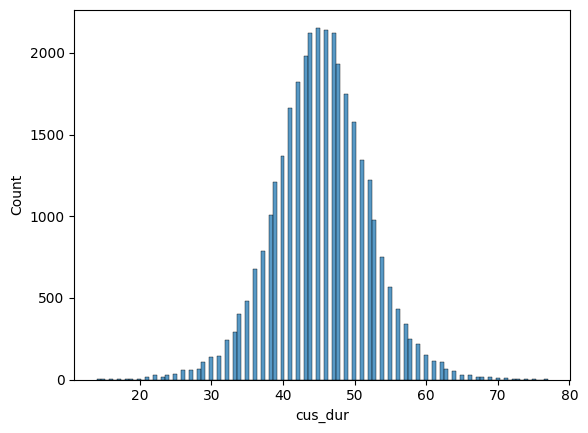

In [72]:
sns.histplot(x='cus_dur', data=df_demo)
plt.show()

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


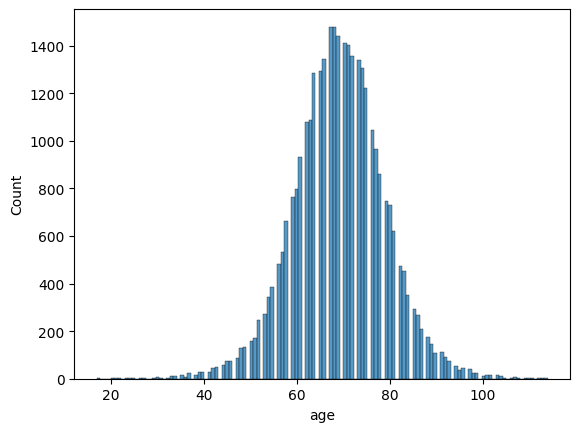

In [71]:
sns.histplot(x='age', data=df_demo)
plt.show()

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


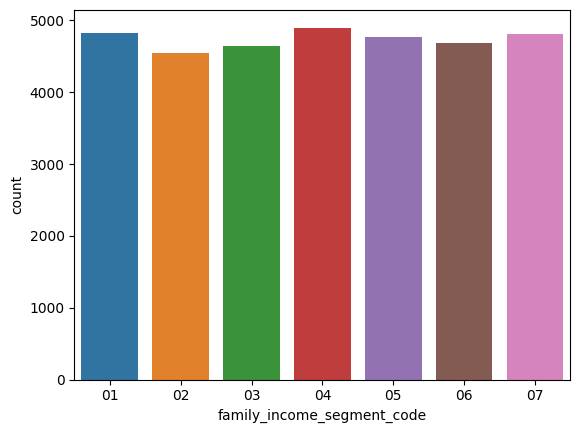

In [53]:
# sns.countplot(x='family_income_segment_code', data=df_demo, order=df_demo['family_income_segment_code'].value_counts().index)
sns.countplot(x='family_income_segment_code', data=df_demo, order=sorted(df_demo['family_income_segment_code'].unique()))
plt.show()

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


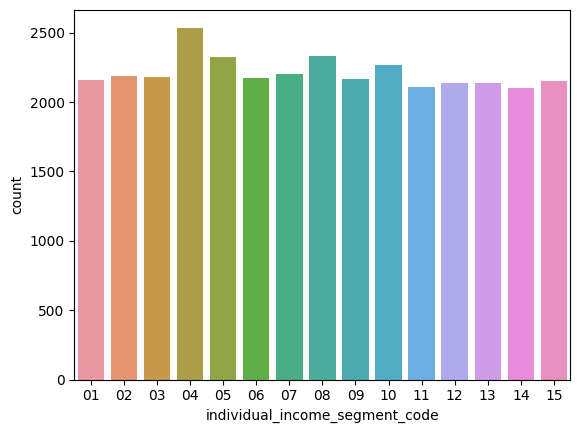

In [54]:
sns.countplot(x='individual_income_segment_code', data=df_demo, order=sorted(df_demo['individual_income_segment_code'].unique()))
plt.show()

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


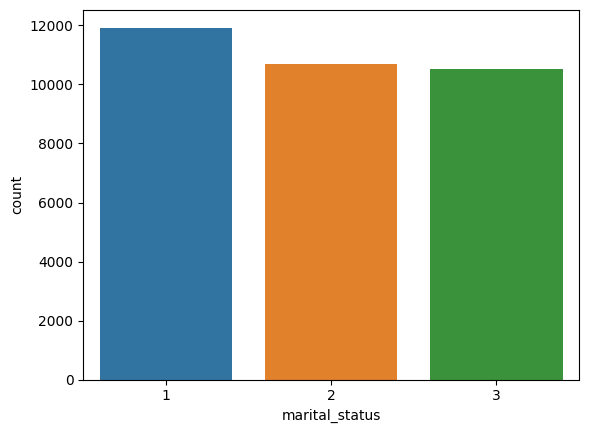

In [55]:
sns.countplot(x='marital_status', data=df_demo, order=sorted(df_demo['marital_status'].unique()))
plt.show()

In [61]:
famind_score = df_demo['family_income_segment_code'] + '-' + df_demo['individual_income_segment_code']
famind_score.value_counts()

04-04    382
06-04    374
05-04    371
01-04    368
07-04    362
        ... 
02-15    280
07-03    278
02-12    274
02-11    273
06-13    265
Name: count, Length: 105, dtype: int64

In [33]:
# df_demo['family_income_segment_code'] = df_demo['family_income_segment_code'].astype(int)
# df_demo['individual_income_segment_code'] = df_demo['individual_income_segment_code'].astype(int)

In [73]:
df_cardinfo.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,60296.0,25662.876028,15238.525017,0.0,12346.00,25395.5,38737.25,52761.0
bill_cyc,60296.0,15.059672,2.754340,0.0,13.00,15.0,17.00,30.0
cr_lmt_amt,60296.0,525042.987926,382398.349754,1000.0,240000.00,451000.0,723000.00,3662000.0
card_no,60296.0,30147.500000,17406.100252,0.0,15073.75,30147.5,45221.25,60295.0


In [75]:
df_cardinfo

,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2
3,3,15.0,518000,3
4,4,15.0,889000,4
...,...,...,...,...
60291,52757,14.0,2146000,60291
60292,52758,12.0,1273000,60292
60293,52759,16.0,1250000,60293
60294,52760,11.0,1078000,60294


In [90]:
# test = pd.merge(df_cardinfo[['user_id', 'cr_lmt_amt']], df_demo[['user_id', 'individual_income_segment_code']], on='user_id')
# sns.scatterplot(x='individual_income_segment_code', y='cr_lmt_amt', data=test)

In [93]:
df_cctxn

,mcc,txn_dt,user_id,txn_amt,card_no
0,mcc_cat10,2017-04-12,17863,16391.0,21616.0
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0
2,mcc_cat12,2017-05-23,33603,55602.0,39476.0
3,mcc_cat4,2017-11-03,44040,38894.0,50979.0
4,mcc_cat14,2017-12-18,4529,29524.0,5582.0
...,...,...,...,...,...
3223070,mcc_cat9,2017-03-01,49742,8164.0,57110.0
3223071,mcc_cat8,2017-11-19,21085,31146.0,25328.0
3223072,mcc_cat3,2017-03-22,35306,31265.0,41396.0
3223073,mcc_cat11,2017-04-01,37777,11044.0,44154.0


In [95]:
df_cctxn.loc[df_cctxn['user_id']==7682]

,mcc,txn_dt,user_id,txn_amt,card_no
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0
89491,mcc_cat7,2017-12-11,7682,75325.0,9438.0
118203,mcc_cat9,2017-03-14,7682,67236.0,9438.0
149912,mcc_cat15,2017-09-19,7682,211116.0,9438.0
248266,mcc_cat15,2017-12-20,7682,36349.0,9438.0
...,...,...,...,...,...
2825094,mcc_cat5,2017-06-11,7682,100864.0,9438.0
2863821,mcc_cat9,2017-06-05,7682,132598.0,9438.0
2891310,mcc_cat13,2017-06-19,7682,138995.0,9438.0
2990227,mcc_cat10,2017-04-17,7682,10572.0,9438.0


In [98]:
card_count = df_cctxn.groupby('user_id').agg(card_count = ('card_no', 'nunique')).reset_index()

In [94]:
df_cctxn['txn_dt'] = pd.to_datetime(df_cctxn['txn_dt'])